# Q1: What is the cost function of Logistic Regression? Explain in Detail.

Some regression algorithms can be used for classification as well (and vice versa). Logistic Regression (also called Logit Regression) is commonly used to estimate the
probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs
to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to
the negative class, labeled “0”). This makes it a binary classifier

$$ \hat{p} = h_\theta (x) = \sigma(\theta^T \cdot x)$$
Logit function is:
$$ \sigma(t) = \frac{1}{1 + exp(-t)}$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

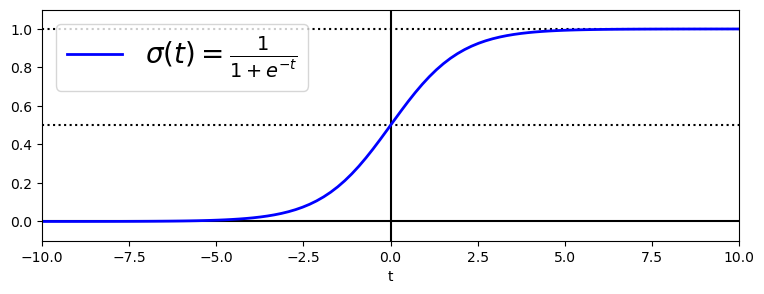

In [2]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

if $\hat{p} < 0.5$ then $\hat{y} = 0$ <br>
if $\hat{p} > 0.5$ then $\hat{y} = 1$

The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances ($y = 1$) and low probabilities for negative instances ($y = 0$). This idea is captured by the cost function shown:
$$
c(\theta) = \begin{cases}
 -log(\hat{p})  & \text{if } y = 1\\
 -log(1 - \hat{p})  & \text{if } y = 0
 \end{cases}
$$
$-log(\hat{p})$ grows very large as $\hat{p}$ approaches $0$, and  $-log(1 - \hat{p})$ grows very large as  $\hat{p}$ approaches 1. The cost of the training set is the sum of the costs function for all instances:
$$
J(\theta) = - \frac{1}{m} \sum^m_{i=1}[y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1-\hat{p}^{(i)})]
$$
There is no closed form solution. However, the gradient is convex, so we can find global minimum. The partial deriviatives of the cost function with regards to the jth model parameters $\theta_j$ is:
$$
\frac{\partial J(\theta)}{\partial \theta} =  \frac{1}{m} \sum^m_{i=1})(\sigma(\theta^T \cdot x^{(i)}) - y^{(i)})x^{(i)}_j 
$$


The goal of logistic regression is to find the parameters \(\theta\) that minimize this cost function, typically using optimization algorithms like gradient descent.

# Q2: What are voting classifiers in ensemble learning?

Voting classifiers are an ensemble learning method that combines the predictions of multiple models to improve overall performance. There are two types of voting classifiers:

1. **Hard Voting**: Each individual model votes for a class, and the class with the majority votes is selected as the final prediction. This method operates on the principle of majority rule.

2. **Soft Voting**: Each model provides a probability for each class, and the class with the highest average probability across all models is chosen as the final prediction. Soft voting generally performs better because it considers the confidence of each model in its predictions.


### Summary

- **Cost Function of Logistic Regression**: The log-loss or binary cross-entropy function measures the performance of a classification model by comparing the predicted probabilities to the actual class labels.
- **Voting Classifiers**: An ensemble method that combines the predictions of multiple models to improve overall performance, using either hard voting (majority rule) or soft voting (average probabilities).


# Q3: Model Building for NVIDIA (NVDA) using SVM

In [3]:
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [4]:
# Download NVIDIA stock historical data
ticker = "NVDA"
data = yf.download(ticker, start="2014-01-01", end="2024-01-01")

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Feature engineering
data['Momentum'] = data['Adj Close'] - data['Adj Close'].shift(5)
data['SMA'] = data['Adj Close'].rolling(window=5).mean()
data['EMA'] = data['Adj Close'].ewm(span=5, adjust=False).mean()
data['O-C'] = data['Open'] - data['Close']
data['H-L'] = data['High'] - data['Low']

# Define target variable: 1 if return > 0, else 0
data['Target'] = (data['Returns'] > 0).astype(int)

# Drop any rows with NaN values
data.dropna(inplace=True)

# Features and target
X = data[['Momentum', 'SMA', 'EMA', 'O-C', 'H-L']]
y = data['Target']



[*********************100%%**********************]  1 of 1 completed


In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Create SVM classifier and use GridSearchCV to optimize hyperparameters
params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_model = GridSearchCV(SVC(), params, cv=5)
svm_model.fit(X_train_scaled, y_train)

# Output the best parameters
print("Best parameters:", svm_model.best_params_)


Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


[[151  68]
 [ 42 242]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       219
           1       0.78      0.85      0.81       284

    accuracy                           0.78       503
   macro avg       0.78      0.77      0.77       503
weighted avg       0.78      0.78      0.78       503

ROC AUC: 0.8560036015177825


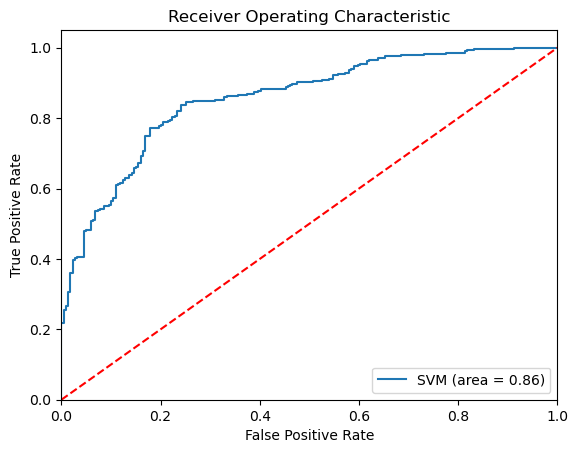

In [7]:
# Predict the test set results
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate ROC AUC
y_pred_proba = svm_model.decision_function(X_test_scaled)
auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC:', auc)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



1. **Confusion Matrix**:

    - **True Negatives (TN)**: 151; **False Positives (FP)**: 68; **False Negatives (FN)**: 42; **True Positives (TP)**: 242
    
    - The model correctly identifies 242 out of 284 positive moves (true positives) and 151 out of 219 negative moves (true negatives).
    - There are 68 false positives and 42 false negatives. The higher recall for the positive class indicates the model is better at capturing the upward trends (positive moves) but has room for improvement in reducing false positives.
    

2. **Model Performance**:

    - **Accuracy**: The SVM model achieves an accuracy of 78%, which is a strong indicator of its overall performance.
    - **Precision and Recall**: The model maintains a good balance between precision and recall. For the positive class (1), the precision is 0.78, and recall is 0.85. This suggests that the model is good at identifying true positive instances.
    - **F1-Score**: The F1-scores of 0.73 for class 0 and 0.81 for class 1 indicate a balanced performance, combining both precision and recall effectively.
    

3. **ROC AUC Analysis**:

    - The Area Under the ROC Curve (AUC) is 0.856, which indicates a good level of separability between the classes. The ROC curve demonstrates the true positive rate (sensitivity) against the false positive rate (1-specificity).

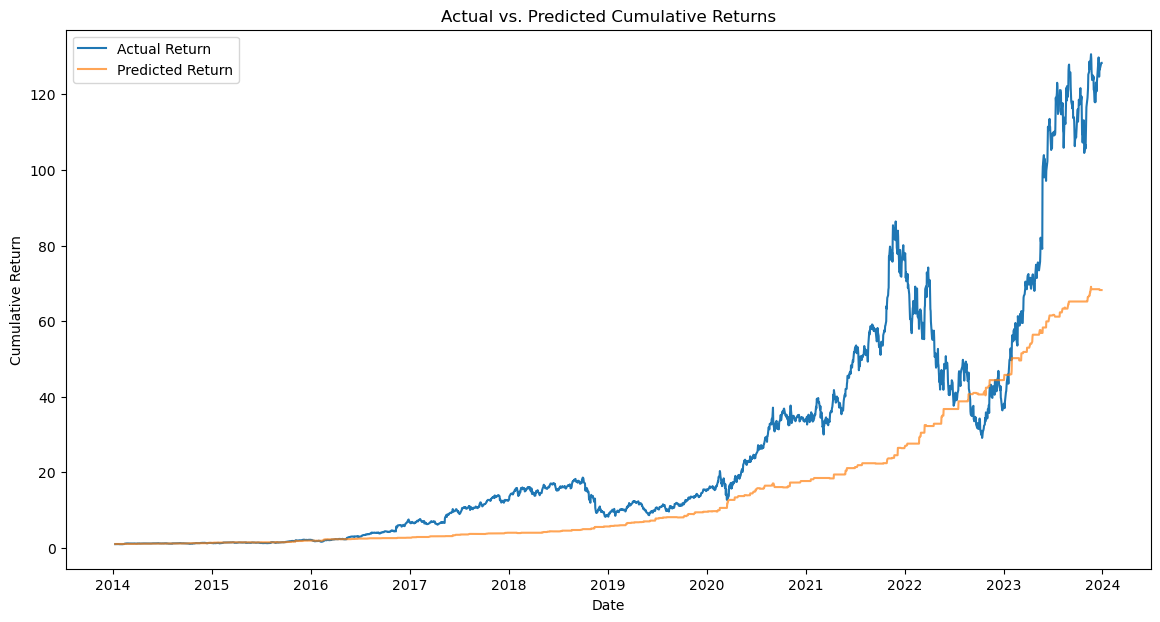

In [8]:
# Calculate cumulative returns for actual and predicted values
data['Cumulative Return'] = (1 + data['Returns']).cumprod()
data['Predicted Return'] = np.nan
data.loc[X_test.index, 'Predicted Return'] = y_pred
data['Predicted Cumulative Return'] = (1 + data['Predicted Return'].fillna(0) * data['Returns']).cumprod()

# Plot the actual vs. predicted cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Actual Return')
plt.plot(data.index, data['Predicted Cumulative Return'], label='Predicted Return', alpha=0.7)
plt.title('Actual vs. Predicted Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

    - **Actual Return**: The blue line represents the actual cumulative return of NVDA stock.
    - **Predicted Return**: The orange line represents the cumulative return predicted by the model.


    

4. **Cumulative Return Analysis**:
    - The actual cumulative returns (blue line) demonstrate the real performance of NVDA stock over the analyzed period.
    - The predicted cumulative returns (orange line), while generally following the trend of the actual returns, are consistently lower. This suggests that the model can predict the direction of the stock movements but tends to underestimate the magnitude of the returns.
    - The gap between the actual and predicted returns could be attributed to the model's inability to fully capture the volatility or sudden large movements in the stock price.

### Conclusion

- **Effectiveness**: The SVM model is effective in predicting the direction of NVDA stock price movements, with good accuracy and ROC AUC.
- **Predictive Power**: While the model performs well in predicting the direction of returns, it is less effective in capturing the exact magnitude of returns, as evidenced by the cumulative returns plot.
